In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.tree import *
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/%20Stroke%20Prediction%20Dataset/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

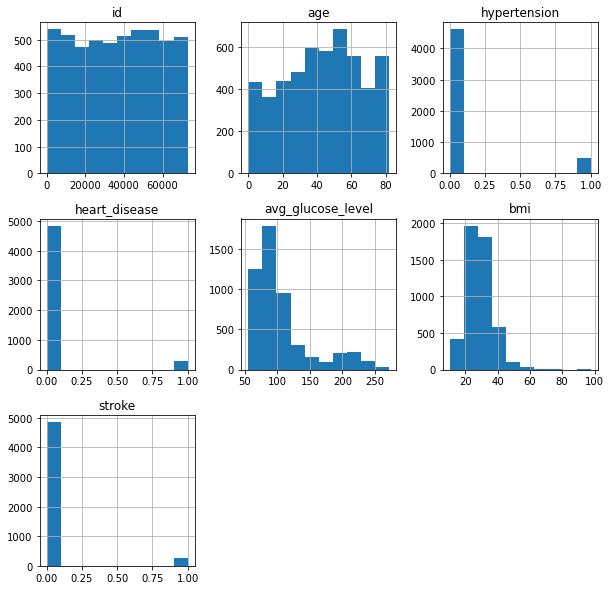

In [3]:
data.hist(figsize=(10,10))

In [4]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [5]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
cat = ['gender','ever_married','Residence_type','smoking_status','work_type']
for i in cat:
    dummy = pd.get_dummies(data[i],drop_first=True,prefix=f"{i}_")
    data = pd.concat([data,dummy],axis=1)

In [9]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender__Other,ever_married__Yes,Residence_type__Urban,smoking_status__formerly smoked,smoking_status__never smoked,smoking_status__smokes,work_type__Never_worked,work_type__Private,work_type__Self-employed,work_type__children
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,0,1,1,1,0,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,0,1,0,0,1,0,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,1,1,0,0,1,0,1,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,1,0,0,0,1,0


In [10]:
data = data.drop([*cat, 'id'], axis=1)

In [11]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender__Male,gender__Other,ever_married__Yes,Residence_type__Urban,smoking_status__formerly smoked,smoking_status__never smoked,smoking_status__smokes,work_type__Never_worked,work_type__Private,work_type__Self-employed,work_type__children
0,67.0,0,1,228.69,36.6,1,1,0,1,1,1,0,0,0,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.4,1,0,0,1,1,0,0,1,0,1,0,0
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [12]:
data.corrwith(data['stroke'])

age                                0.245257
hypertension                       0.127904
heart_disease                      0.134914
avg_glucose_level                  0.131945
bmi                                0.042374
stroke                             1.000000
gender__Male                       0.009117
gender__Other                     -0.003166
ever_married__Yes                  0.108340
Residence_type__Urban              0.015458
smoking_status__formerly smoked    0.064556
smoking_status__never smoked      -0.004129
smoking_status__smokes             0.008939
work_type__Never_worked           -0.014882
work_type__Private                 0.011888
work_type__Self-employed           0.062168
work_type__children               -0.083869
dtype: float64

In [13]:
X = data.drop('stroke',axis=1).values
y = data['stroke'].values
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    imputer = KNNImputer(n_neighbors=2)
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.fit_transform(X_test)
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f = f1_score(y_true = y_test , y_pred = y_pred,average = 'weighted')
    
    print(f)

0.9056147234002119
0.9193040965530727
0.9093514759766317
0.9097980262363825
0.9143414663291798


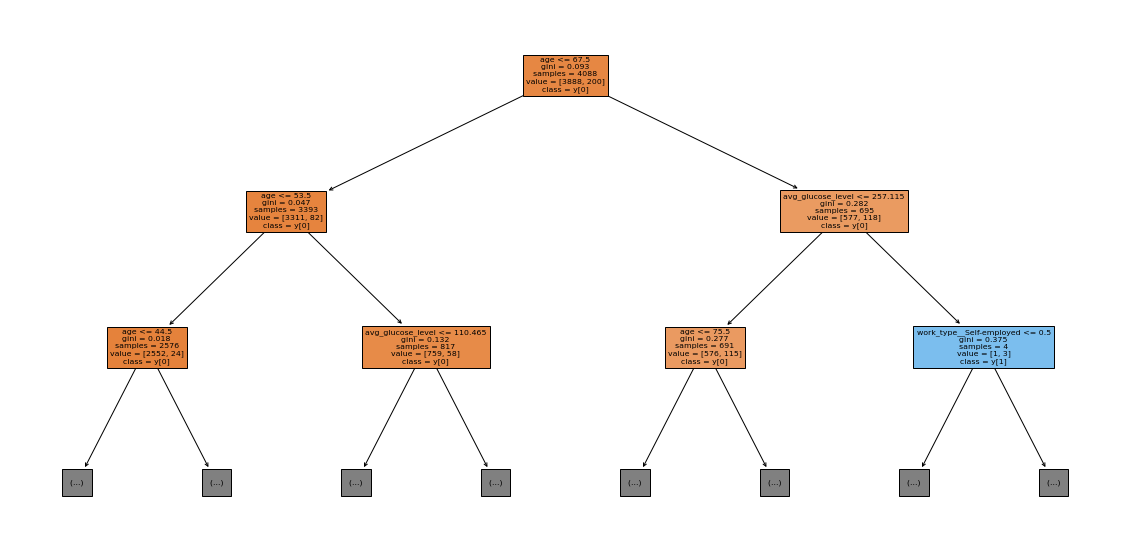

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=data.drop('stroke',axis=1).columns,max_depth = 2,filled=True,class_names = True)
plt.show()